In [1]:
%load_ext autoreload
%autoreload 2

import pickle
import pandas as pd
import numpy as np

from plotting_functions import compare_tracking_errors, compare_outputs_box_whiskers, plot_experiment_dashboard, plot_animation,compare_outputs

### TODO
* Try with joint limit on joint 1, so that it can't go above bar

In [2]:
experiment_names = [
    'horizon_1',
    'horizon_5',
    'horizon_10',
    'horizon_20',
    'horizon_50',
    'horizon_100',
]

In [3]:
all_logs = {}
for experiment_name in experiment_names:
    with open('experiment_data/'+experiment_name+'.pickle', 'rb') as handle:
        log = pickle.load(handle)
        df_cont = pd.DataFrame(log['log_list'])
        all_logs[experiment_name] = df_cont

In [4]:
keys = list(all_logs.keys())
keys.sort()
keys.sort(key=len)
print(keys)

['horizon_1', 'horizon_5', 'horizon_10', 'horizon_20', 'horizon_50', 'horizon_100']


### Tracking errors

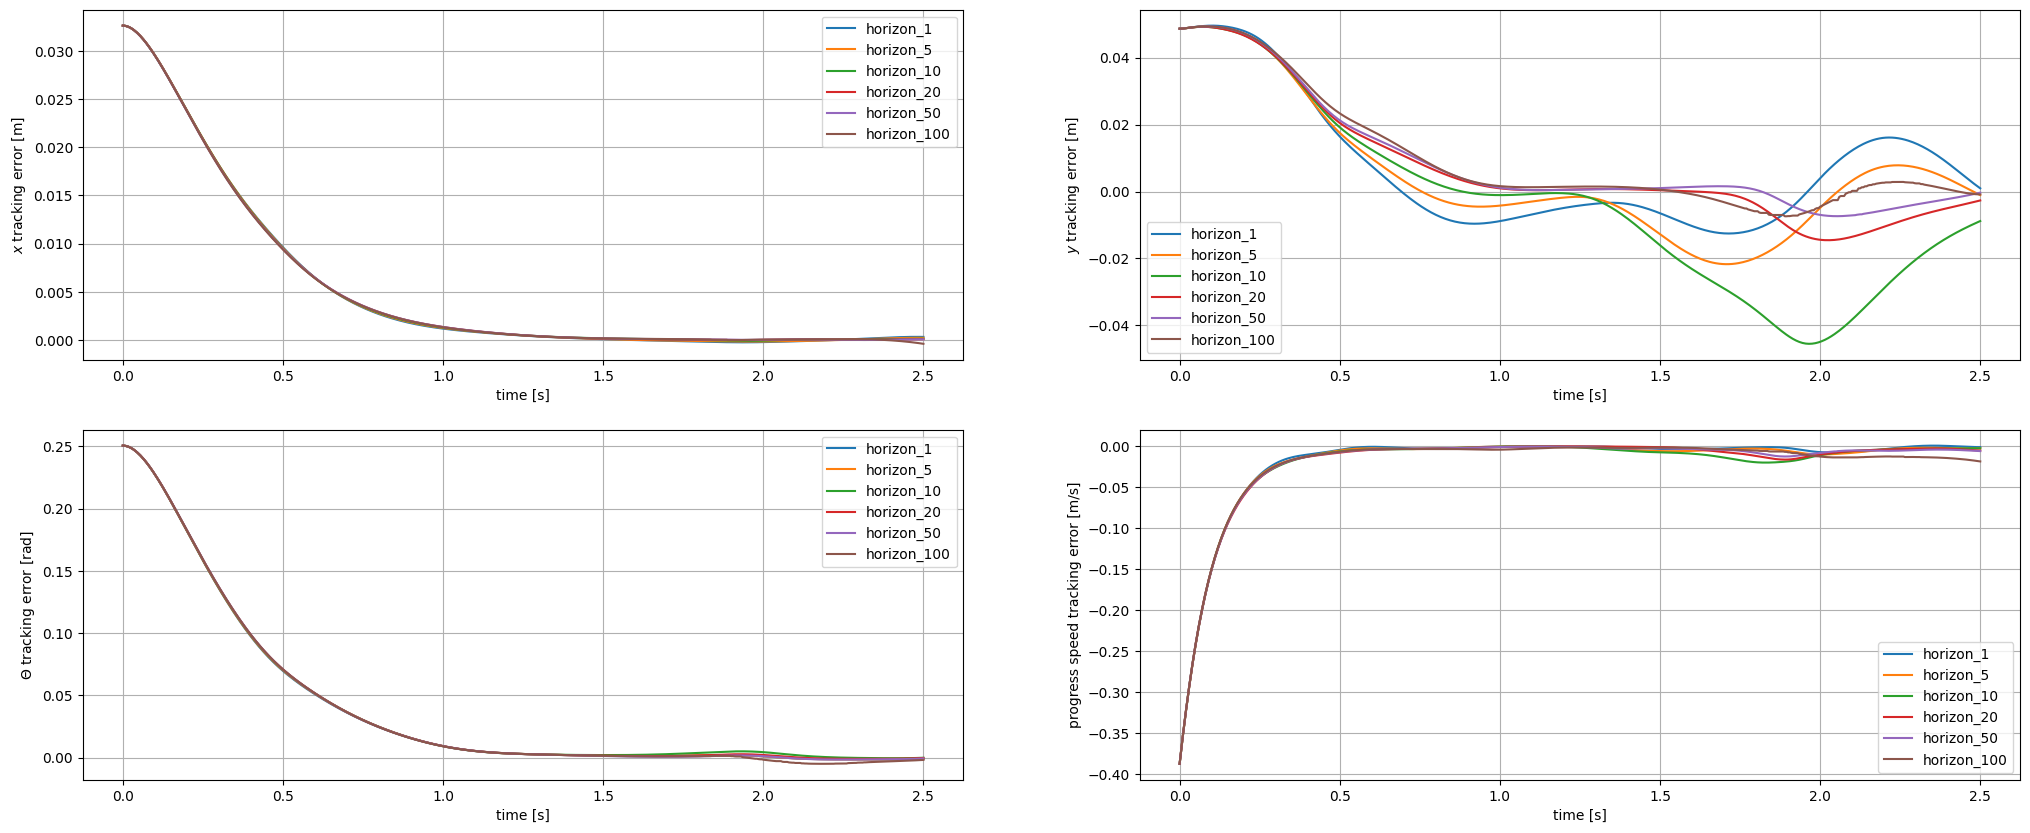

In [5]:
compare_tracking_errors(all_logs,keys)
# compare_tracking_errors(all_logs,['horizon_1', 'horizon_500'])

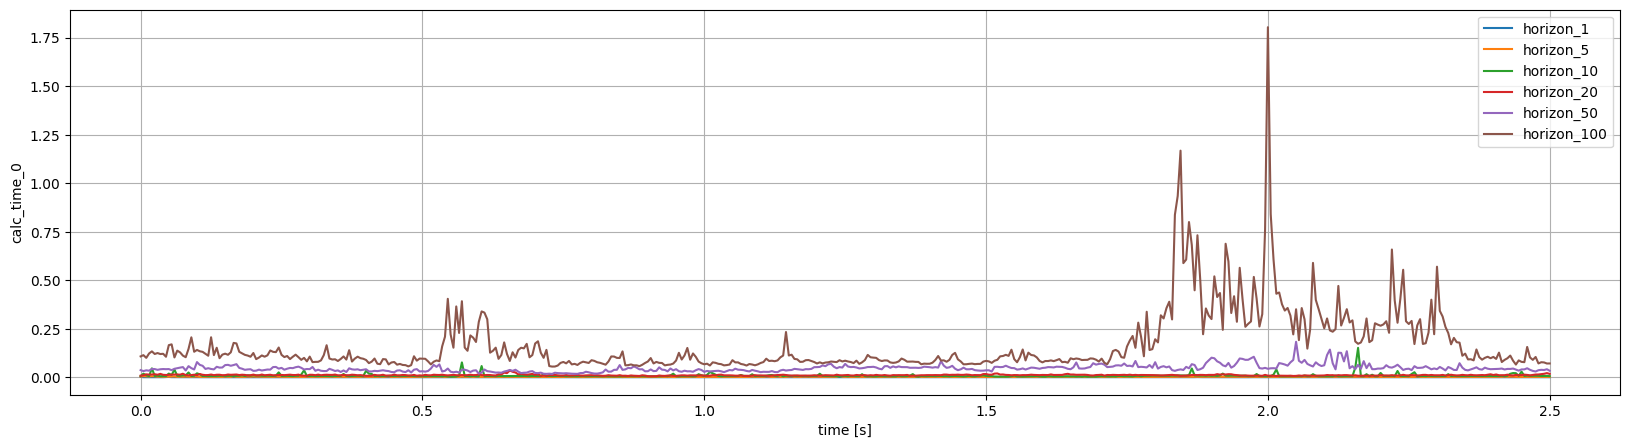

In [6]:
compare_outputs(all_logs,keys,'calc_time')

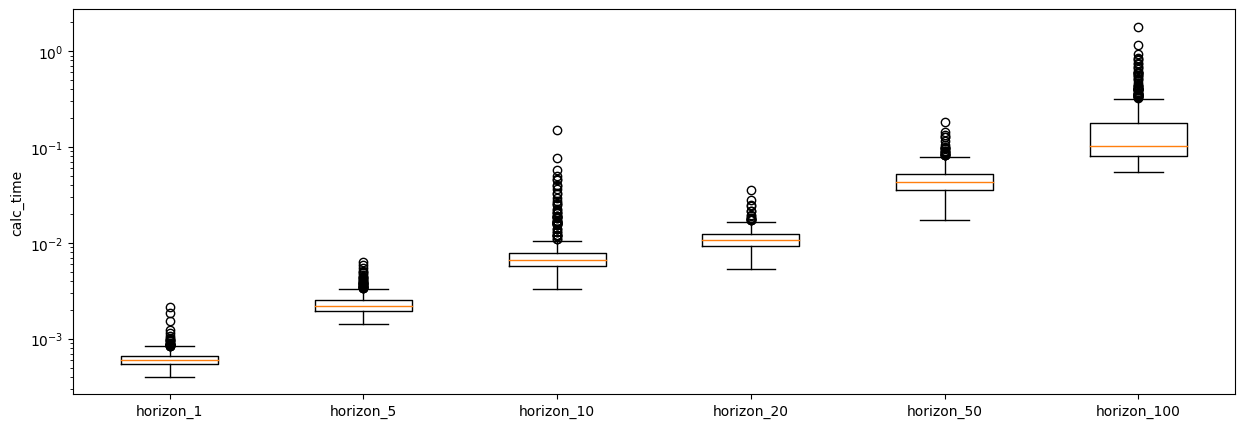

In [7]:
compare_outputs_box_whiskers(
  all_logs,
  keys, 
  # 'iter_count'
  'calc_time'
)

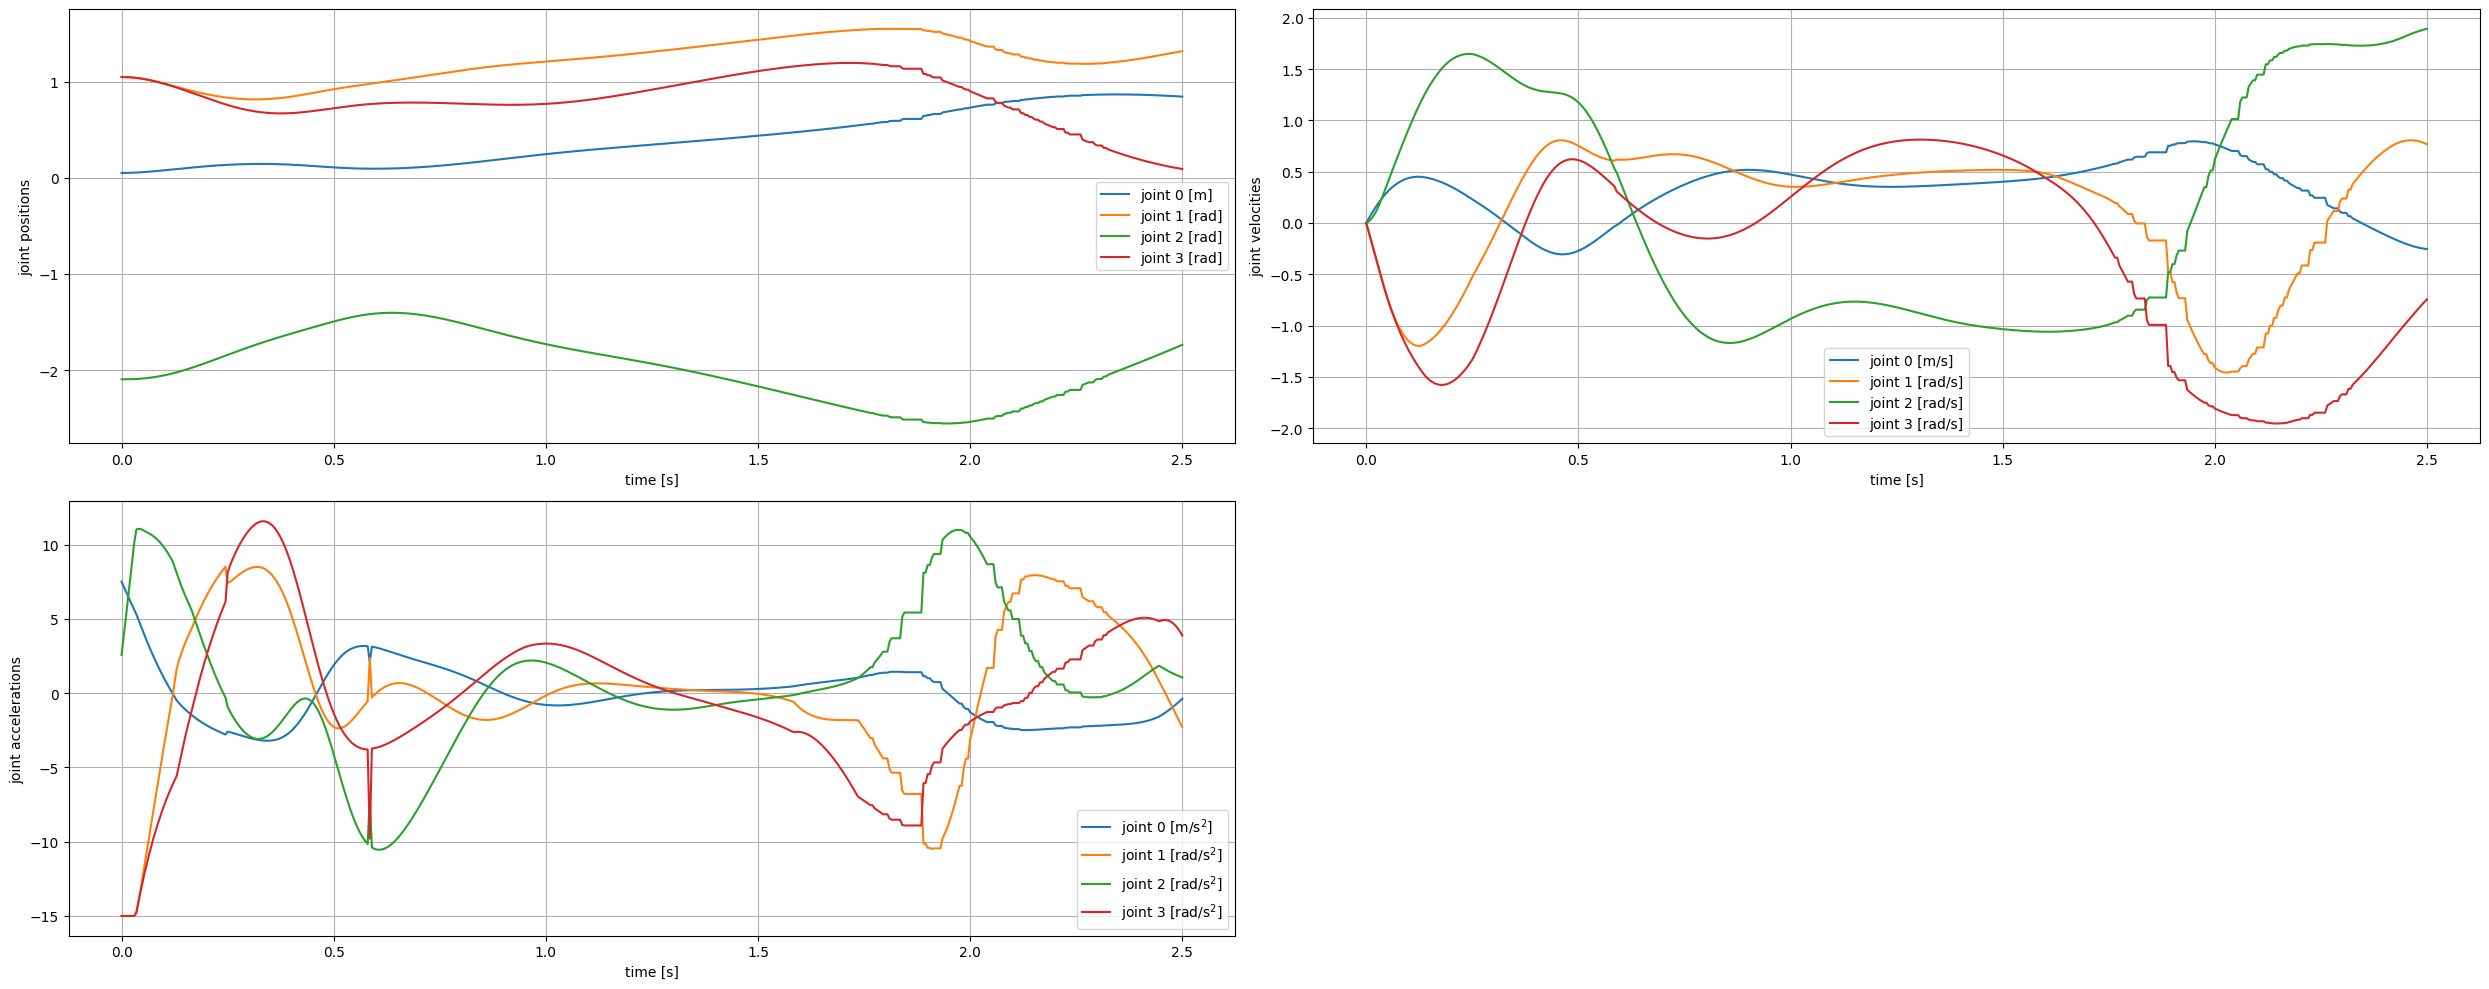

In [8]:
plot_experiment_dashboard(all_logs,keys[-1])

In [9]:
from simulator import Simulator

In [10]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

In [11]:
def create_dataset(Y_train):
  X_train = np.array(range(11)).reshape(-1,1)
  
  y_vec = np.empty((0,100))

  for y_train in Y_train:
    kernel = 1 * RBF(length_scale=0.2, length_scale_bounds=(1e-2, 1e2))
    gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
    gpr = GaussianProcessRegressor(kernel=kernel, alpha=0.008)
    gpr.fit(X_train, y_train)
    x_sample = np.linspace(0,10,100).reshape(-1,1)
    
    y_vec = np.concatenate((y_vec,gpr.sample_y(x_sample,10).T/10+0.1), axis=0)
    # plt.plot(x_sample/10, gpr.sample_y(x_sample,10)/10)
    # plt.ylim(-0.1,1)
    
  return y_vec

In [12]:
Y_train = np.array([
    [ 1, 1.2, 1.7, 2 , 2 , 2  , 2 , 1.5, 2  , 1, 1 ],
    [ 1, 0.5, 0.5, 1 , 1 , 0.5, 1 , 1.2, 0.8, 1, 1 ],
    [ 1, 0.6, 0.4, 1 , 1 , 1.5, 1.8 , 2, 1.8, 1, 1 ],
])

y_vec = create_dataset(Y_train)

train_data = y_vec[np.array(range(30))!=10]
train_data = train_data.reshape((train_data.shape[0], train_data.shape[1],1))
train_data = [trajectory.T for trajectory in train_data]
test_data = y_vec[10]

### Create simulation environment

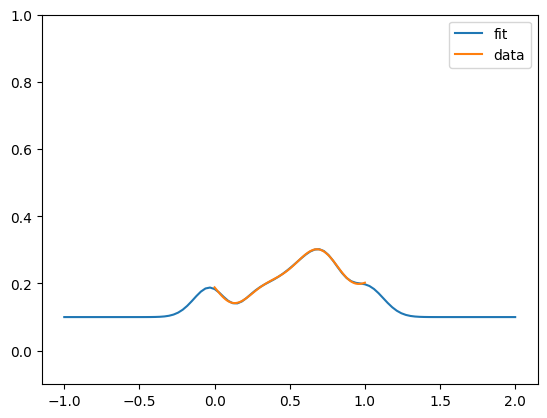

In [13]:
simulator = Simulator()
num_basis = 10
simulator.fit_rbf_linear(y_vec[22],num_basis) # Use custom surface
# simulator.fit_quadratic(y_vec[11]) # Use custom surface
# w_actual = simulator.w

In [14]:
plot_animation(simulator,all_logs,'horizon_10',stride=1)

In [87]:
from pseudo_etasl import utils

In [88]:
df_cont = pd.DataFrame(all_logs['horizon_1'])

utils.plot_output(df_cont,"q")

In [38]:
all_logs_sequential = all_logs